# Building an Image Classification Model

**Dataset:** MNIST **[Loading using CSV]**

Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
1. Loading and preprocessing the image data
2. Defining the model's architecture
3. Training the model
4. Estimating the model's performance

### Import Necessary Packages

Import the necessary libraries for building and training the model:
- **NumPy and Pandas:** For data manipulation and handling.
- **TensorFlow and Keras:** To build and train our CNN model.
- **Matplotlib:** To visualize model performance.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

### 1. Loading and Preprocessing the Image Data

Load and preprocess the MNIST dataset, which is stored in CSV files.
- **Loading Data:** We load training and test sets from `mnist_train.csv` and `mnist_test.csv`.
- **Separating Labels and Features:** The `label` column contains the target classes (digits 0-9), while the other columns contain pixel values.
- **Normalization:** We scale pixel values to the range [0, 1] by dividing by 255.
- **Reshaping Images:** Each image is reshaped to `(28, 28, 1)`, where `1` represents a single grayscale channel, matching the CNN's input requirements.
- **One-Hot Encoding Labels:** Labels are converted into one-hot encoded vectors for multi-class classification.


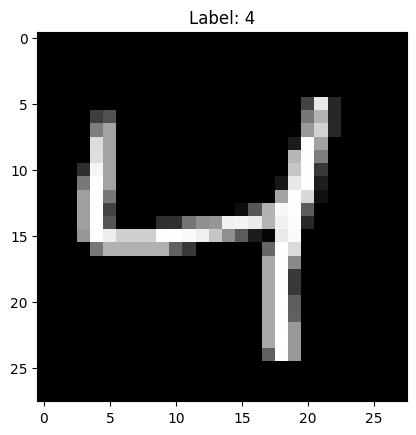

In [ ]:
# Load training and testing data from CSV
train_data = pd.read_csv("Datasets/MNIST_CSV/mnist_train.csv")
test_data = pd.read_csv("Datasets/MNIST_CSV/mnist_test.csv")

# Separate labels and features
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the images to (28, 28, 1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Display a sample image to verify
plt.imshow(x_train[2].reshape(28, 28), cmap="gray")
plt.title(f"Label: {np.argmax(y_train[2])}")
plt.show()

### 2. Defining the Model's Architecture

Define a CNN model to learn the patterns in the hand-written digit images.
- **Conv2D Layers:** Two convolutional layers with ReLU activation for extracting spatial features.
- **MaxPooling Layers:** Pooling layers reduce the spatial dimensions, focusing on prominent features.
- **Flatten Layer:** Flattens the 2D feature maps into a 1D vector to feed into fully connected layers.
- **Dense Layers:** The final layers include a dense layer with ReLU and an output layer with softmax for multi-class probability distribution.

The model is compiled with:
- **Optimizer:** Adam for adaptive learning rates.
- **Loss:** Categorical cross-entropy, suitable for multi-class classification.
- **Metrics:** Accuracy to monitor model performance.


In [3]:
# Create a sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training the Model

Train the CNN on the training data for 10 epochs, using a batch size of 128.

- **Epochs:** Iterations over the entire training set to improve model accuracy.
- **Validation Data:** The model’s performance on the test data is monitored at each epoch.
- **Verbose:** Controls the display of training progress. Here, set to 2 for minimal output per epoch.
 
This step outputs the model's performance on both training and test data, which we’ll visualize in the next section.

In [4]:
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=10, 
                    validation_data=(x_test, y_test), 
                    verbose=2)

Epoch 1/10
469/469 - 10s - 21ms/step - accuracy: 0.9414 - loss: 0.2001 - val_accuracy: 0.9823 - val_loss: 0.0573
Epoch 2/10
469/469 - 8s - 17ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9848 - val_loss: 0.0468
Epoch 3/10
469/469 - 9s - 19ms/step - accuracy: 0.9884 - loss: 0.0373 - val_accuracy: 0.9900 - val_loss: 0.0298
Epoch 4/10
469/469 - 9s - 19ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 5/10
469/469 - 9s - 20ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9918 - val_loss: 0.0257
Epoch 6/10
469/469 - 10s - 20ms/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 0.9923 - val_loss: 0.0237
Epoch 7/10
469/469 - 9s - 20ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9908 - val_loss: 0.0290
Epoch 8/10
469/469 - 9s - 18ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9897 - val_loss: 0.0326
Epoch 9/10
469/469 - 9s - 19ms/step - accuracy: 0.9969 - loss: 0.0094 - val_accuracy: 0.9911 - val_los

### 4. Estimating the Model's Performance

Estimating the Model's Performance

After training, we evaluate the model's accuracy and loss on the test dataset.

- **Test Accuracy:** Indicates how well the model generalizes to unseen data.
- **Test Loss:** A lower value implies the model has learned features effectively without overfitting.

We also plot the training and validation accuracy and loss over epochs to visualize learning trends.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0547
Test accuracy: 98.73%


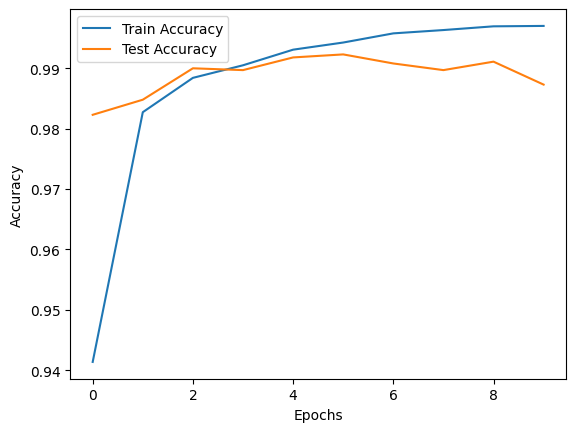

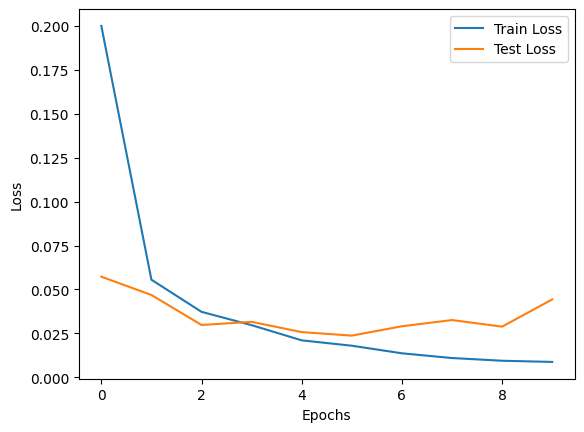

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Visualize Model Prediction on a Single Test Image

To observe a specific model prediction:
- **Predicted Class:** We use `model.predict()` on a test image to get predicted probabilities for each class.
- **Visualization:** Display the image with the predicted class to verify if the model prediction aligns with the image content.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


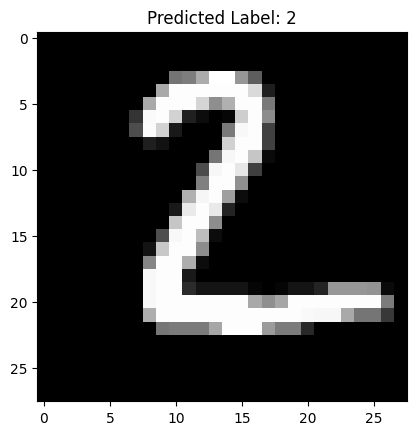

In [6]:
predicted_value = model.predict(x_test)
plt.imshow(x_test[1].reshape(28, 28), cmap="gray")
plt.title(f"Predicted Label: {np.argmax(predicted_value[1])}")
plt.show()